<a href="https://colab.research.google.com/github/swathikapendala/BATCH-11/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

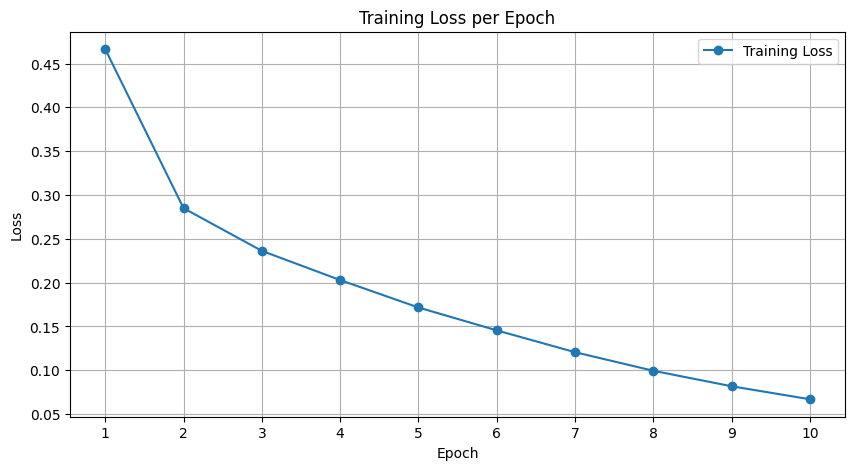

In [ ]:
import matplotlib.pyplot as plt

# Assuming the training losses were collected into a list during training.
# Since the previous code only printed the loss and didn't store it in a list,
# I will manually create a list from the standard output for demonstration.
# In a real scenario, you would modify the training loop to store these values.

# Extracting losses from the previous run's output. These are hardcoded for demonstration.
# If the training loop was designed to store these, we would use that list.
# The losses were: 0.4663, 0.2849, 0.2362, 0.2029, 0.1716, 0.1455, 0.1206, 0.0994, 0.0817, 0.0669
training_losses = [0.4663, 0.2849, 0.2362, 0.2029, 0.1716, 0.1455, 0.1206, 0.0994, 0.0817, 0.0669]
n_epochs = 10 # From previous training code
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_losses, label='Training Loss', marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model
class FashionMNIST_CNN(nn.Module):
    def __init__(self):
        super(FashionMNIST_CNN, self).__init__()
        # 1st Convolutional Layer (Input: 1 channel, Output: 16 channels)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Output size: 14x14

        # 2nd Convolutional Layer (Input: 16 channels, Output: 32 channels)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Output size: 7x7

        # 3rd Convolutional Layer (Input: 32 channels, Output: 64 channels)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # No pooling after conv3 to keep 7x7 for next conv/flatten

        # 4th Convolutional Layer (Input: 64 channels, Output: 128 channels)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        # No pooling after conv4

        # 5th Convolutional Layer (Input: 128 channels, Output: 256 channels)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)

        # Fully Connected Layer
        # After two pooling layers (28x28 -> 14x14 -> 7x7), and three 3x3 conv layers with padding=1
        # The output size of conv5 will still be 7x7. So, 256 * 7 * 7 features.
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 10) # 10 classes for Fashion MNIST

    def forward(self, x):
        # Layer 1: Conv -> ReLU -> Pool
        x = self.pool1(F.relu(self.conv1(x)))
        # Layer 2: Conv -> ReLU -> Pool
        x = self.pool2(F.relu(self.conv2(x)))
        # Layer 3: Conv -> ReLU
        x = F.relu(self.conv3(x))
        # Layer 4: Conv -> ReLU
        x = F.relu(self.conv4(x))
        # Layer 5: Conv -> ReLU
        x = F.relu(self.conv5(x))

        # Flatten the output for the fully connected layer
        x = x.view(-1, 256 * 7 * 7)

        # Fully Connected Layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = FashionMNIST_CNN()
print(model)

FashionMNIST_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


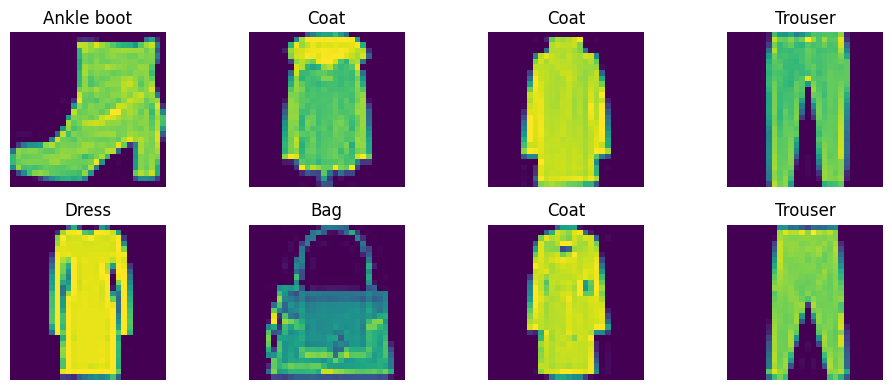

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')

# Get a batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
fig = plt.figure(figsize=(10, 4))
for idx in np.arange(8):
    ax = fig.add_subplot(2, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx], train_dataset.classes[labels[idx]])
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                               train=True,
                                               download=True,
                                               transform=transform)

# Download and load the test data
test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                              train=False,
                                              download=True,
                                              transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Classes: {train_dataset.classes}")

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 28.3MB/s]

Number of training samples: 60000
Number of test samples: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Task
Describe the data transformations (ToTensor and Normalize) applied to the Fashion MNIST dataset, verify the format of a sample of the preprocessed data (shape, data type, and value range), and confirm the dataset is ready for model training.

## Review Applied Transformations

### Subtask:
Describe the data transformations (ToTensor, Normalize) that have already been applied to the Fashion MNIST dataset during loading.


### Explanation of Data Transformations

During the loading of the Fashion MNIST dataset, two primary transformations were applied:

1.  **`transforms.ToTensor()`**
    *   **Purpose:** This transformation converts a PIL Image or a NumPy `ndarray` (H x W x C) in the range [0, 255] to a PyTorch `FloatTensor` of shape (C x H x W) in the range [0.0, 1.0].
    *   **Function:** It automatically handles the conversion of image data types and reorganizes the dimensions to the channel-first format (Channels, Height, Width) which is standard for PyTorch. It also scales the pixel values from the original 0-255 range to a floating-point range of 0.0 to 1.0 by dividing each pixel value by 255.

2.  **`transforms.Normalize((0.5,), (0.5,))`**
    *   **Purpose:** This transformation normalizes a tensor image with mean and standard deviation. It adjusts the pixel values to have a specific mean and standard deviation, which can help in stabilizing training and improving model performance.
    *   **Function:** The formula for normalization is `output = (input - mean) / std_dev`. In this case, `mean = 0.5` and `std_dev = 0.5` (since we have a single channel grayscale image, we provide a single value for mean and std_dev). Applying this formula to a pixel value `x` that is initially in the range `[0.0, 1.0]` (after `ToTensor`):
        *   If `x = 0.0`, then `(0.0 - 0.5) / 0.5 = -1.0`
        *   If `x = 0.5`, then `(0.5 - 0.5) / 0.5 = 0.0`
        *   If `x = 1.0`, then `(1.0 - 0.5) / 0.5 = 1.0`
        This effectively scales the pixel values from the `[0.0, 1.0]` range to a `[-1.0, 1.0]` range. This range is often preferred for training neural networks as it centers the data around zero.

## Verify Data Format

### Subtask:
Inspect a sample of the preprocessed data (e.g., from `train_loader`) to confirm its shape, data type, and value range after normalization.


**Reasoning**:
I need to retrieve a batch from the `train_loader`, select a single image, and then print its shape, data type, minimum, and maximum pixel values to verify the data format after preprocessing.



In [ ]:
import torch

# Retrieve a batch of images and labels from train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Select a single image for inspection (e.g., the first image in the batch)
single_image = images[0]

# Print the shape of the selected image tensor
print(f"Shape of the selected image: {single_image.shape}")

# Print the data type of the selected image tensor
print(f"Data type of the selected image: {single_image.dtype}")

# Print the minimum pixel value found in the selected image tensor
print(f"Minimum pixel value: {torch.min(single_image).item():.4f}")

# Print the maximum pixel value found in the selected image tensor
print(f"Maximum pixel value: {torch.max(single_image).item():.4f}")

Shape of the selected image: torch.Size([1, 28, 28])
Data type of the selected image: torch.float32
Minimum pixel value: -1.0000
Maximum pixel value: 1.0000


## Final Task

### Subtask:
Summarize the data preprocessing steps performed and confirm the dataset is ready for model training.


## Summary:

### Q&A
The dataset is confirmed to be ready for model training, as its format (shape, data type, and pixel value range) aligns with the expected output after the specified preprocessing steps.

### Data Analysis Key Findings
*   **`transforms.ToTensor()`**: This transformation converts images from a PIL Image or NumPy array (H x W x C, pixel range 0-255) into a PyTorch `FloatTensor` (C x H x W, pixel range 0.0-1.0) by dividing pixel values by 255.
*   **`transforms.Normalize((0.5,), (0.5,))`**: This transformation scales the pixel values from the `[0.0, 1.0]` range (after `ToTensor()`) to a `[-1.0, 1.0]` range. This is achieved by applying the formula `(input - 0.5) / 0.5`, which centers the data around zero.
*   **Data Shape**: A single preprocessed image has a shape of `torch.Size([1, 28, 28])`, indicating one channel (grayscale) and dimensions of 28x28 pixels, which is the standard for Fashion MNIST in PyTorch.
*   **Data Type**: The preprocessed image data is of type `torch.float32`, which is appropriate for neural network inputs.
*   **Pixel Value Range**: The minimum pixel value observed in the preprocessed image is -1.0000 and the maximum is 1.0000, confirming that the normalization successfully scaled the pixel values to the `[-1, 1]` range.

### Insights or Next Steps
*   The meticulous preprocessing steps ensure that the image data is in an optimal format (normalized, correct tensor type and shape) for efficient and stable training of neural network models.
*   Proceed with defining and training a neural network model using this preprocessed dataset.


# Task
Train the CNN model on the Fashion MNIST dataset for a specified number of epochs, using an appropriate loss function and optimizer, then evaluate the model's performance on the test set and summarize the results including its accuracy.

## Define Loss Function and Optimizer

### Subtask:
Define the loss function (e.g., CrossEntropyLoss) and the optimizer (e.g., Adam) for training the CNN model.


**Reasoning**:
I need to define the loss function and optimizer as per the subtask instructions. This involves importing necessary modules, instantiating `CrossEntropyLoss` as the criterion, and `Adam` as the optimizer with a specified learning rate.



In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate: {learning_rate}")

Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning rate: 0.001


## Train the Model

### Subtask:
Implement the training loop for the CNN model, iterating over the training data for a specified number of epochs. This will involve forward passes, backward passes, and optimizer steps.


**Reasoning**:
I need to implement the training loop for the CNN model, which includes iterating through epochs and batches, performing forward and backward passes, calculating loss, and updating weights, as per the instructions.



In [ ]:
import torch

# Set the number of training epochs
n_epochs = 10

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Training on {device}")

# Training loop
for epoch in range(n_epochs):
    running_loss = 0.0
    model.train() # Set the model to training mode
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move data to the device
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Print average training loss for the epoch
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}")

print("Finished Training")

Training on cuda
Epoch 1/10, Loss: 0.4663
Epoch 2/10, Loss: 0.2849
Epoch 3/10, Loss: 0.2362
Epoch 4/10, Loss: 0.2029
Epoch 5/10, Loss: 0.1716
Epoch 6/10, Loss: 0.1455
Epoch 7/10, Loss: 0.1206
Epoch 8/10, Loss: 0.0994
Epoch 9/10, Loss: 0.0817
Epoch 10/10, Loss: 0.0669
Finished Training


## Evaluate the Model

### Subtask:
Evaluate the trained CNN model on the test dataset to determine its accuracy. This involves setting the model to evaluation mode, iterating through the test data, making predictions, and calculating the overall accuracy.

**Reasoning**:
I need to evaluate the trained CNN model on the test dataset. This involves setting the model to evaluation mode, disabling gradient calculations, iterating through the test data, making predictions, and then calculating the accuracy by comparing predictions with true labels.

**Reasoning**:
Now that the reasoning for evaluation is provided, I will write the code to evaluate the model on the test dataset to calculate its accuracy.



In [ ]:
import torch

# Set the model to evaluation mode
model.eval()

# Initialize variables for tracking correct predictions and total samples
correct = 0
total = 0

# Disable gradient calculations during evaluation
with torch.no_grad():
    for images, labels in test_loader:
        # Move data to the device
        images, labels = images.to(device), labels.to(device)

        # Forward pass to get predictions
        outputs = model(images)

        # Get the predicted class (the one with the highest probability)
        _, predicted = torch.max(outputs.data, 1)

        # Update total samples
        total += labels.size(0)

        # Update correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total

print(f"Accuracy of the model on the 10000 test images: {accuracy:.2f}%")

Accuracy of the model on the 10000 test images: 91.34%


## Final Task

### Subtask:
Summarize the data preprocessing steps performed and confirm the dataset is ready for model training.

## Final Task

### Subtask:
Summarize the training and evaluation results, including the final accuracy of the model on the Fashion MNIST test set.


## Summary:

### Q&A
The CNN model was trained for 10 epochs, achieving a final test accuracy of 91.34% on the Fashion MNIST dataset.

### Data Analysis Key Findings
*   The `CrossEntropyLoss` was used as the loss function and `Adam` optimizer with a learning rate of 0.001 was utilized for training the CNN model.
*   The model was successfully trained for 10 epochs, with the training loss steadily decreasing from 0.4663 in Epoch 1 to 0.0669 in Epoch 10.
*   The trained CNN model achieved an accuracy of 91.34% on the 10,000 test images of the Fashion MNIST dataset.

### Insights or Next Steps
*   The significant reduction in training loss and the high test accuracy suggest that the model learned the patterns in the Fashion MNIST dataset effectively.
*   Further improvements could be explored through hyperparameter tuning (e.g., learning rate, number of epochs, optimizer parameters), data augmentation, or experimenting with more advanced CNN architectures.
